In [242]:
import librosa
import numpy as np
from scipy.spatial.distance import cosine
from fastdtw import fastdtw
import noisereduce as nr
import os
import IPython.display as ipd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [243]:
def preprocessing(audio):
    y , sr = librosa.load(audio, sr=44100)
    y, _ = librosa.effects.trim(y, top_db=20)
    # y = librosa.util.fix_length(y, size=600000, mode = 'constant')
    # y = librosa.util.normalize(y)
    # y = librosa.effects.preemphasis(y)
    y = nr.reduce_noise(y, sr)
    # y = normalize(y[:, np.newaxis], axis=0).ravel()
    return y,sr

In [244]:
def extraction(audio):
    y , sr = preprocessing(audio)
    y = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=512,
                                 htk=False,
                                 hop_length=256,
                                 n_fft=512,
                                 norm='ortho',
                                 dct_type=2,
                                 n_mels=20,
                                 center=False)
    mfccs = librosa.util.normalize(mfccs)
    # mfccs = normalize(mfccs[:, np.newaxis], axis=0).ravel()
    return mfccs.T

In [245]:
sample_audio_path = "../Dataset/01.Ha\'/Ha\'_M1_3.wav"

In [246]:
ipd.Audio(sample_audio_path)

In [247]:
y , sr = preprocessing(sample_audio_path)
y = librosa.effects.preemphasis(y)

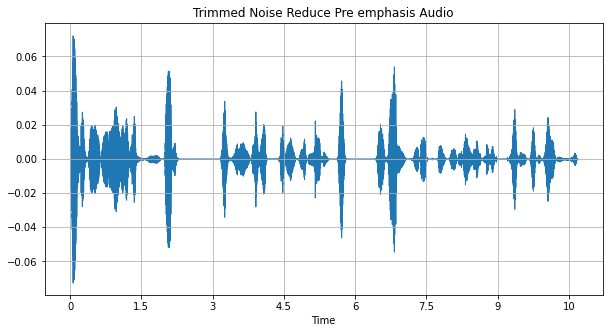

In [248]:
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y , sr=sr)
plt.title('Trimmed Noise Reduce Pre emphasis Audio')
plt.grid(True)
plt.show()

# mel

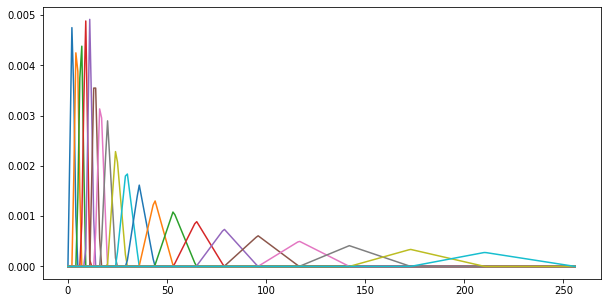

In [249]:
mel =librosa.filters.mel(sr=sr, n_fft=512, n_mels=20, fmin=0, htk=False) # awal = fmax=sr / 2

fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

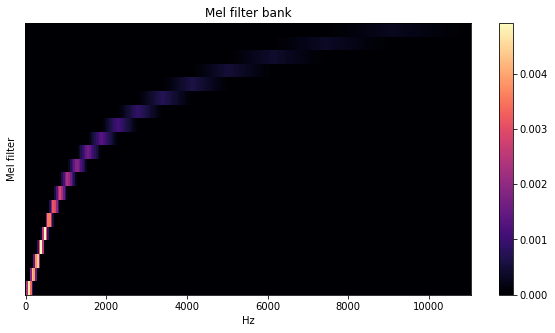

In [250]:
fig, ax = plt.subplots(figsize = (10,5))
fig.patch.set_facecolor('white')
img = librosa.display.specshow(mel, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)
plt.show()

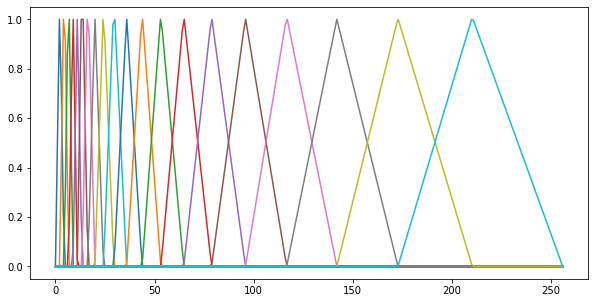

In [251]:
mel /= np.max(mel, axis=-1)[:, None]
fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

# Spectogram

In [252]:
D = librosa.stft(y, window='hamming', n_fft=512, hop_length=256)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
# S_db = librosa.util.normalize(S_db)

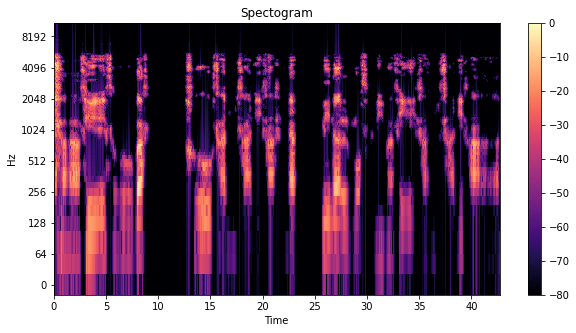

In [253]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('white')
img = librosa.display.specshow(S_db,
                               x_axis = 'time',
                               y_axis= 'log',
                               ax=ax)
ax.set_title('Spectogram')
fig.colorbar(img)
plt.show()

# mel spectogram

In [254]:
S_mel = librosa.feature.melspectrogram(
                                    y=y,
                                   sr=sr,
                                   n_mels = 20,
                                   n_fft=512,
                                   hop_length=256,
                                   window='hamming'
                                   )

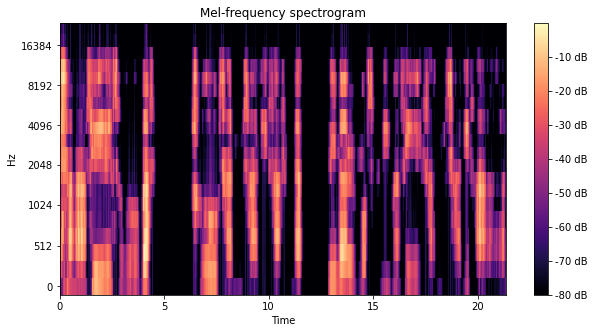

In [255]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('white')
S_db_mel = librosa.power_to_db(S_mel, ref=np.max)
img = librosa.display.specshow(S_db_mel, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=None, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

# MFCC

In [256]:
mfccs = extraction(sample_audio_path)
print(mfccs.shape)

(1839, 13)


In [257]:
mfccs

array([[-1.0000000e+00, -6.0658395e-02, -1.8918565e-01, ...,
         6.0706757e-02, -2.0877028e-02, -9.2373713e-04],
       [-1.0000000e+00, -5.5019464e-02, -1.5691136e-01, ...,
         5.8008783e-02, -1.7343763e-02,  6.7689246e-03],
       [-1.0000000e+00, -8.3208747e-02, -1.6353770e-01, ...,
         2.8792406e-02, -3.6659539e-02, -2.5156053e-02],
       ...,
       [-1.0000000e+00,  1.1730546e-01,  1.6752355e-02, ...,
         2.8303685e-02,  3.2626688e-02,  1.8086925e-02],
       [-1.0000000e+00,  8.5303232e-02,  2.0986369e-02, ...,
         1.3643587e-02,  1.8502656e-02,  1.3779367e-02],
       [-1.0000000e+00,  5.0692763e-02,  8.2830209e-03, ...,
         2.3834061e-02,  2.7340908e-02,  1.9816756e-02]], dtype=float32)

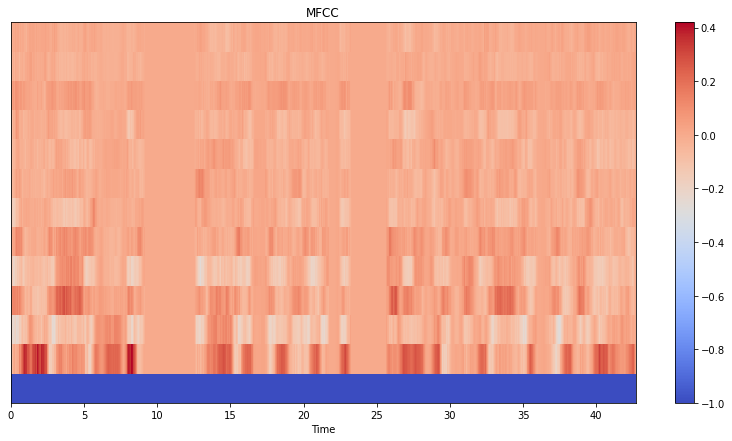

In [258]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(mfccs.T, x_axis='time')
plt.title('MFCC')
plt.colorbar()
plt.show()

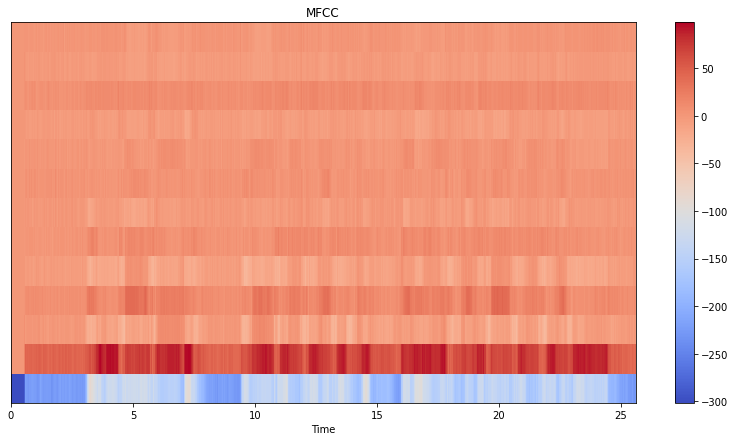

In [259]:
y,sr = librosa.load(sample_audio_path, sr=44100)
mfcc2 = librosa.feature.mfcc(y=y,sr=sr, n_mels=20, n_mfcc=13, n_fft=1024)
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(mfcc2, x_axis='time')
plt.title('MFCC')
plt.colorbar()
plt.show()

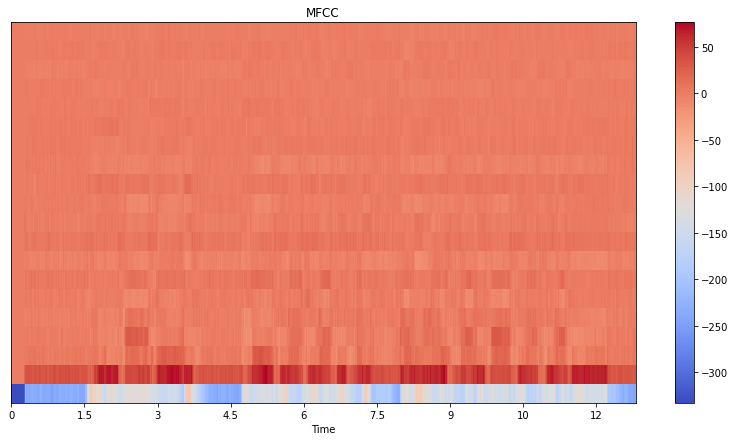

In [264]:
y,sr = librosa.load(sample_audio_path, sr=22050)
mfcc2 = librosa.feature.mfcc(y=y,sr=sr, n_fft=512, n_mels=20, hop_length=512)
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(mfcc2, x_axis='time')
plt.title('MFCC')
plt.colorbar()
plt.show()